---
---
### UNaB: Universidad Nacional Guillermo Brown
#### Inferencia estadística y reconocimiento de patrones

## Prof: Sebastian Simondi
# Alumnos : Lucas León González - David Lobos - Euler Diego




----
##"Determinantes del Rendimiento Académico: Un Análisis de Variables Socioeconómicas"
----

El dataset exams.csv contiene información sobre estudiantes y su desempeño en varias asignaturas, como matemáticas, física, química y álgebra. En total, el conjunto de datos consta de 993 entradas y 10 columnas, las cuales incluyen tanto variables categóricas como numéricas. Las columnas categóricas incluyen "Género", "Raza/Etnicidad", "Nivel educativo de los padres", "Almuerzo", "Empleo" y "Curso de preparación de exámenes", mientras que las columnas numéricas corresponden a las notas obtenidas por los estudiantes en las distintas asignaturas.

Este conjunto de datos proporciona una visión de cómo diferentes factores socioeconómicos y educativos pueden influir en el rendimiento académico de los estudiantes.

----
----

##           Ingesta y limpieza de datos

---





In [ ]:
# 1 . IMPORTAR LAS LIBRERIAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configuración de estilo
sns.set(style='whitegrid')

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('exams.csv')

Saving exams.csv to exams.csv


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1018 non-null   object 
 1   gender                       1018 non-null   object 
 2   race/ethnicity               1018 non-null   object 
 3   parental level of education  1018 non-null   object 
 4   lunch                        1018 non-null   object 
 5   employed                     1018 non-null   object 
 6   test preparation course      1018 non-null   object 
 7   math score                   1011 non-null   float64
 8   physics score                1011 non-null   float64
 9   chemistry score              1011 non-null   float64
 10  algebra_score                1011 non-null   float64
dtypes: float64(4), object(7)
memory usage: 87.6+ KB


In [ ]:
# Las 5 primeras filas
df.head()

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0


In [ ]:
# Las ultimas 5 filas
df.tail()

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
1013,82-7312119,male,group E,associate's degree,standard,yes,none,74.0,73.0,67.0,71.0
1014,45-3445439,male,group E,some college,free/reduced,no,none,78.0,84.0,77.0,80.0
1015,02-3651562,male,group A,some college,standard,no,completed,78.0,78.0,74.0,77.0
1016,05-5203587,female,group B,some college,standard,yes,none,75.0,76.0,81.0,77.0
1017,13-3347050,male,group D,some college,standard,no,completed,70.0,60.0,65.0,65.0


In [ ]:
# 3. REVISAR LOS TIPOS DE DATOS
df.dtypes


,0
id,object
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
employed,object
test preparation course,object
math score,float64
physics score,float64
chemistry score,float64


In [ ]:
# 4. Eliminar los duplicados
print(f'Original: {df.id.count()} filas')
duplicate_rows_df =df[df.duplicated()]
print(f'Cantidad de filas duplicadas: {duplicate_rows_df.id.count()}')

# Eliminar los duplicados
df = df.drop_duplicates()

Original: 1018 filas
Cantidad de filas duplicadas: 18


In [ ]:
#Filas despues de eliminar los duplicados
print(f'Original: {df.id.count()} filas')

Original: 1000 filas


In [ ]:
# 5 ELIMINAR LAS COLUMNAS IRRELEVANTES
print(df.columns)
df = df.drop(['id'], axis=1)

Index(['id', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'employed', 'test preparation course', 'math score',
       'physics score', 'chemistry score', 'algebra_score'],
      dtype='object')


In [ ]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'employed', 'test preparation course', 'math score', 'physics score',
       'chemistry score', 'algebra_score'],
      dtype='object')


In [ ]:
df = df.rename(columns = {
    "gender": "Género",
    "race/ethnicity": "Raza/Etnicidad",
    "parental level of education": "Nivel educativo de los padres",
    "lunch": "Almuerzo",
    "employed": "Empleo",
    "test preparation course": "Curso de preparación de exámenes",
    "math score": "Nota en matemáticas",
    "physics score": "Nota en física",
    "chemistry score": "Nota en química",
    "algebra_score": "Nota en álgebra"
})
df

,Género,Raza/Etnicidad,Nivel educativo de los padres,Almuerzo,Empleo,Curso de preparación de exámenes,Nota en matemáticas,Nota en física,Nota en química,Nota en álgebra
0,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0
...,...,...,...,...,...,...,...,...,...,...
1001,male,group C,high school,standard,yes,none,73.0,70.0,65.0,69.0
1002,male,group D,associate's degree,free/reduced,no,completed,85.0,91.0,92.0,89.0
1003,female,group C,some high school,free/reduced,yes,none,32.0,35.0,41.0,36.0
1004,female,group C,some college,standard,yes,none,73.0,74.0,82.0,76.0


In [ ]:
# 7. ELIMINAR LOS VALORES PERDIDOS O NULOS
#Encontrar los valores nulos
print(df.isnull().sum())

#Eliminar los valores perdidos
df = df.dropna()
print()

#Despues de eliminar los nulos
print(df.isnull().sum())

Género                              0
Raza/Etnicidad                      0
Nivel educativo de los padres       0
Almuerzo                            0
Empleo                              0
Curso de preparación de exámenes    0
Nota en matemáticas                 7
Nota en física                      7
Nota en química                     7
Nota en álgebra                     7
dtype: int64

Género                              0
Raza/Etnicidad                      0
Nivel educativo de los padres       0
Almuerzo                            0
Empleo                              0
Curso de preparación de exámenes    0
Nota en matemáticas                 0
Nota en física                      0
Nota en química                     0
Nota en álgebra                     0
dtype: int64


In [ ]:
df

,Género,Raza/Etnicidad,Nivel educativo de los padres,Almuerzo,Empleo,Curso de preparación de exámenes,Nota en matemáticas,Nota en física,Nota en química,Nota en álgebra
0,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0
...,...,...,...,...,...,...,...,...,...,...
1001,male,group C,high school,standard,yes,none,73.0,70.0,65.0,69.0
1002,male,group D,associate's degree,free/reduced,no,completed,85.0,91.0,92.0,89.0
1003,female,group C,some high school,free/reduced,yes,none,32.0,35.0,41.0,36.0
1004,female,group C,some college,standard,yes,none,73.0,74.0,82.0,76.0


----
----
### Análisis Exploratorio de Datos (EDA)
----

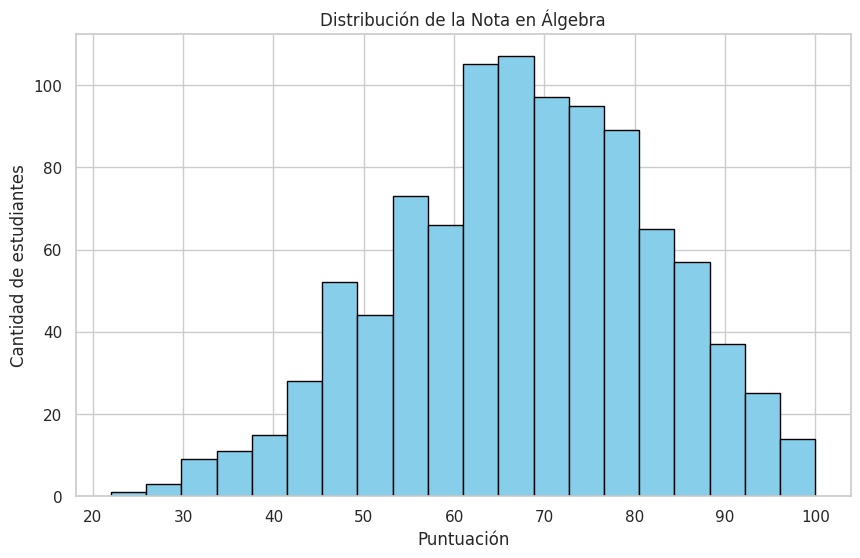

In [ ]:
# Generar histogramas para visualizar la distribución de las puntuaciones
plt.figure(figsize=(10, 6))
plt.hist(df['Nota en álgebra'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribución de la Nota en Álgebra")
plt.ylabel("Cantidad de estudiantes")
plt.xlabel("Puntuación")
plt.show()

"La mayoría de los estudiantes obtuvieron calificaciones entre 50 y 80 puntos en el examen de álgebra, aunque hay un grupo considerable que superó los 80 puntos."

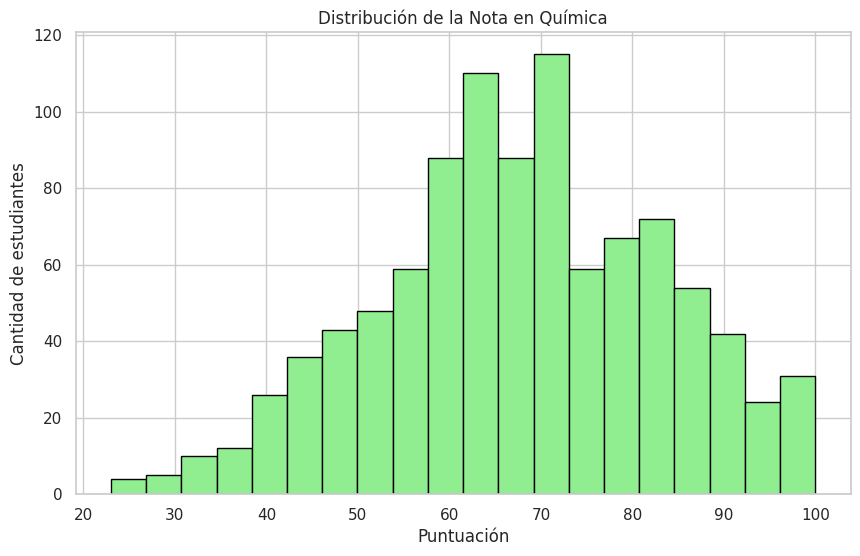

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Nota en química'], bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribución de la Nota en Química")
plt.ylabel("Cantidad de estudiantes")
plt.xlabel("Puntuación")
plt.show()


"La mayoría de los estudiantes obtuvieron calificaciones aprobatorias en Química, con un pico en el rango de 60 a 70 puntos, aunque se observa una cola hacia las calificaciones más altas."


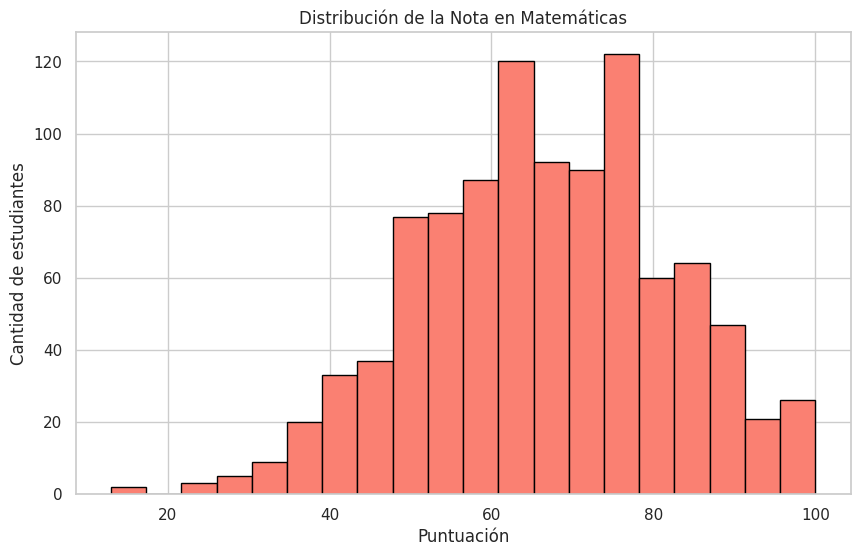

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Nota en matemáticas'], bins=20, color='salmon', edgecolor='black')
plt.title("Distribución de la Nota en Matemáticas")
plt.ylabel("Cantidad de estudiantes")
plt.xlabel("Puntuación")
plt.show()

"La mayoría de los estudiantes obtuvieron calificaciones aprobatorias en Matemáticas, con un pico en el rango de 60 a 70 puntos, aunque se observa una cola hacia las calificaciones más altas."

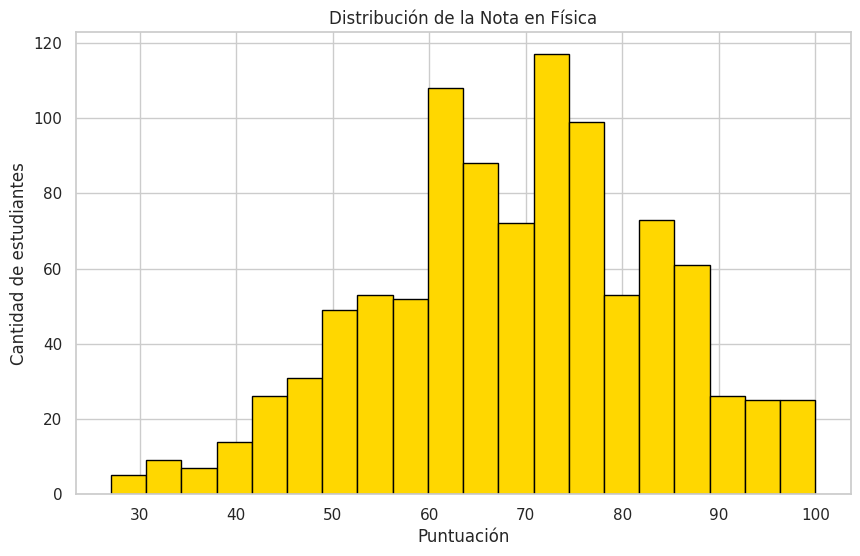

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Nota en física'], bins=20, color='gold', edgecolor='black')
plt.title("Distribución de la Nota en Física")
plt.ylabel("Cantidad de estudiantes")
plt.xlabel("Puntuación")
plt.show()


"La mayoría de los estudiantes obtuvieron calificaciones aprobatorias en Física, con un pico en el rango de 60 a 70 puntos, aunque se observa una cola hacia las calificaciones más altas."

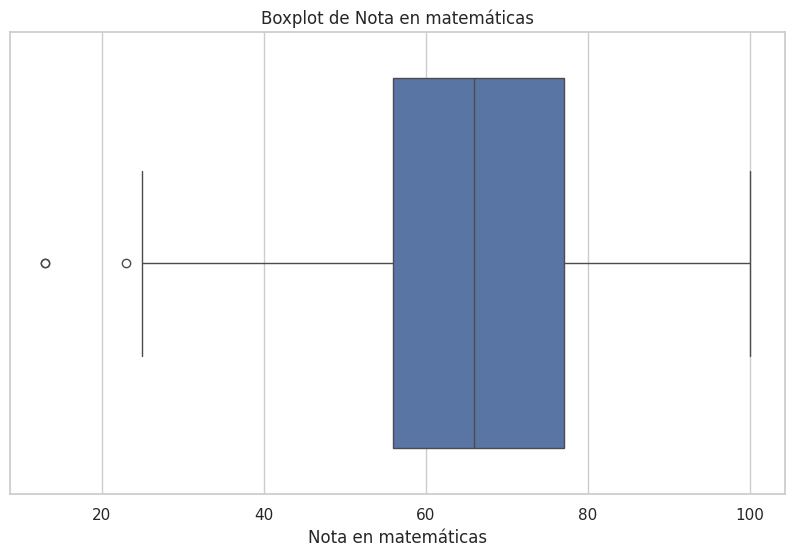

In [ ]:
# Detectar outliers en las columnas de puntuaciones

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Nota en matemáticas'])
plt.title('Boxplot de Nota en matemáticas')
plt.show()

"Muestra una distribución relativamente simétrica, con una mediana alrededor de 65 puntos y una dispersión moderada, aunque se observan algunos valores atípicos por debajo de 20 puntos."

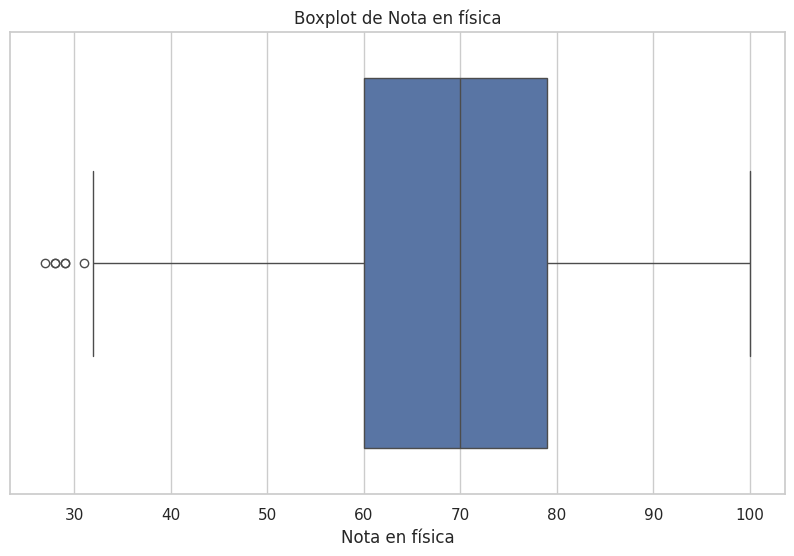

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Nota en física'])
plt.title('Boxplot de Nota en física')
plt.show()

" Muestra una distribución relativamente simétrica, con una mediana alrededor de 65 puntos y una dispersión moderada, aunque se observan algunos valores atípicos por debajo de 30 puntos."

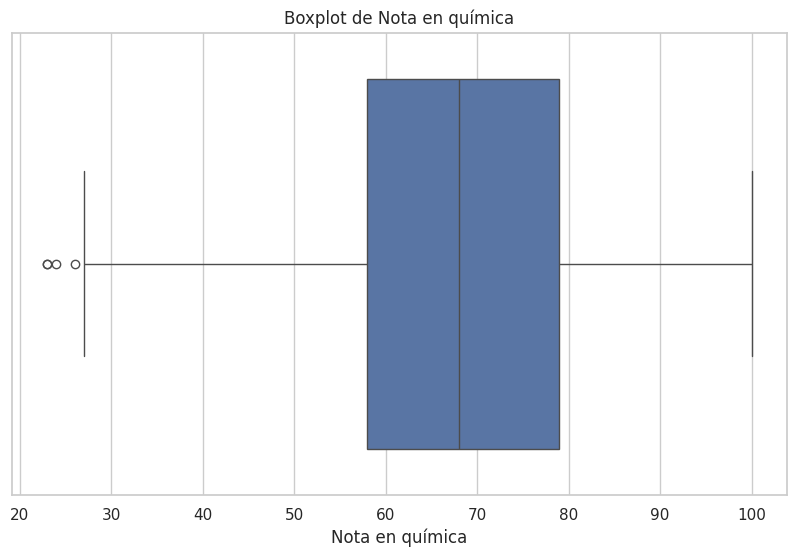

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Nota en química'])
plt.title('Boxplot de Nota en química')
plt.show()

" Muestra una distribución relativamente simétrica, con una mediana alrededor de 65 puntos y una dispersión moderada, aunque se observan algunos valores atípicos por debajo de 30 puntos."

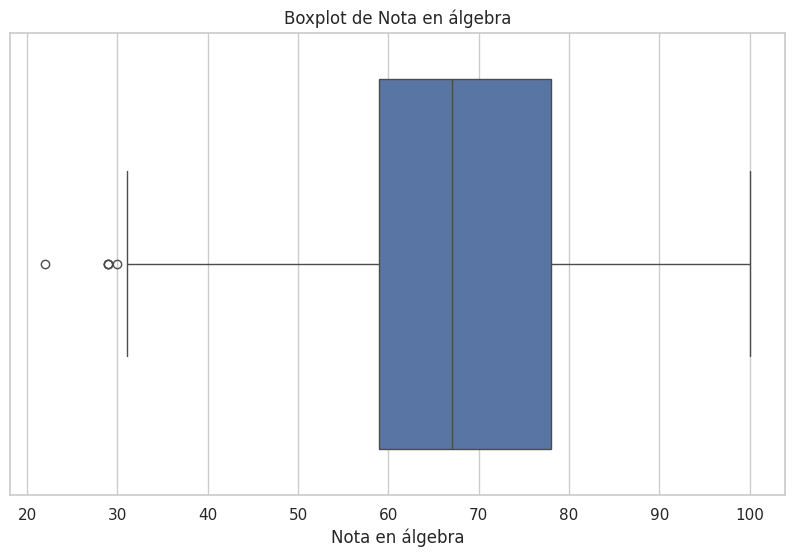

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Nota en álgebra'])
plt.title('Boxplot de Nota en álgebra')
plt.show()


"Muestra una distribución relativamente simétrica, con una mediana alrededor de 65 puntos y una dispersión moderada, aunque se observan algunos valores atípicos por debajo de 30 puntos."

In [ ]:
# Mostrar la cantidad de filas antes de eliminar outliers
print(f'Antes: {df["Almuerzo"].count()} filas\n')

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[float, int])

# Calcular los cuartiles y el IQR para cada columna numérica
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

print("IQR para cada columna:\n", IQR)

# Filtrar los outliers en todas las columnas numéricas
df_filtered = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Mostrar la cantidad de filas después de eliminar outliers
print(f'\nDespués: {df_filtered["Almuerzo"].count()} filas')


Antes: 993 filas

IQR para cada columna:
 Nota en matemáticas    21.0
Nota en física         19.0
Nota en química        21.0
Nota en álgebra        19.0
dtype: float64

Después: 984 filas


In [ ]:
df_filtered

,Género,Raza/Etnicidad,Nivel educativo de los padres,Almuerzo,Empleo,Curso de preparación de exámenes,Nota en matemáticas,Nota en física,Nota en química,Nota en álgebra
0,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0
...,...,...,...,...,...,...,...,...,...,...
1001,male,group C,high school,standard,yes,none,73.0,70.0,65.0,69.0
1002,male,group D,associate's degree,free/reduced,no,completed,85.0,91.0,92.0,89.0
1003,female,group C,some high school,free/reduced,yes,none,32.0,35.0,41.0,36.0
1004,female,group C,some college,standard,yes,none,73.0,74.0,82.0,76.0


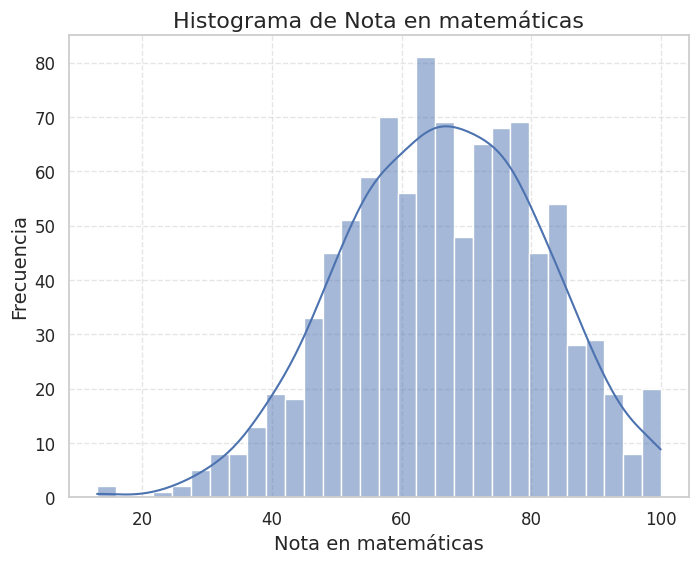

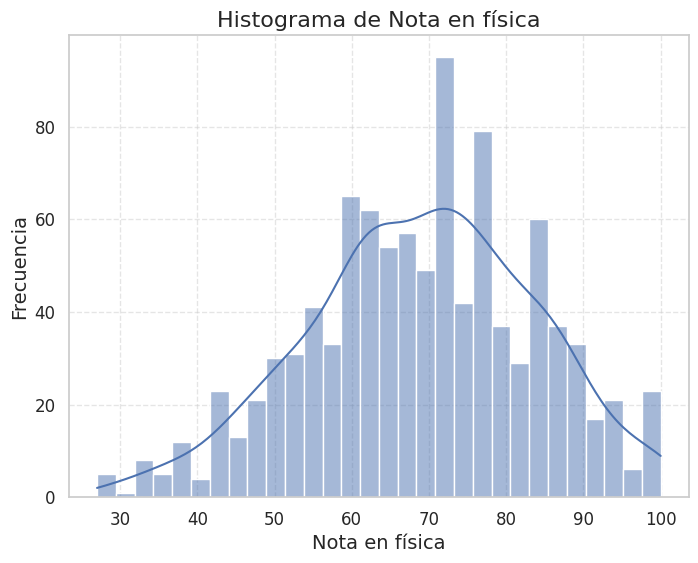

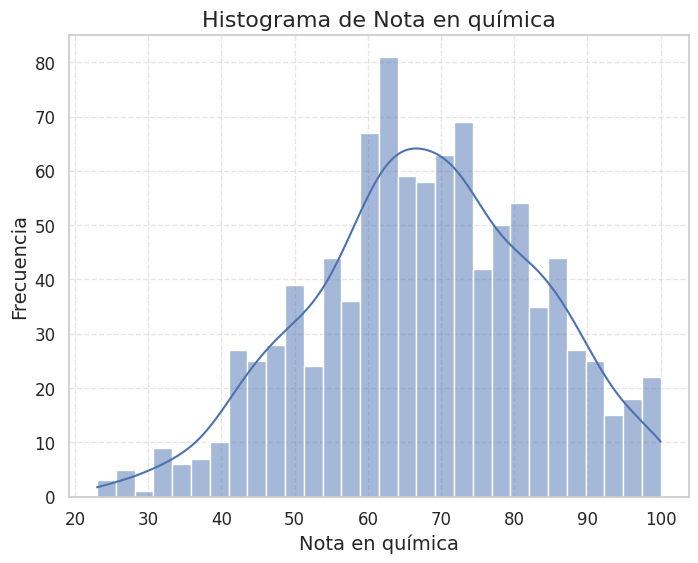

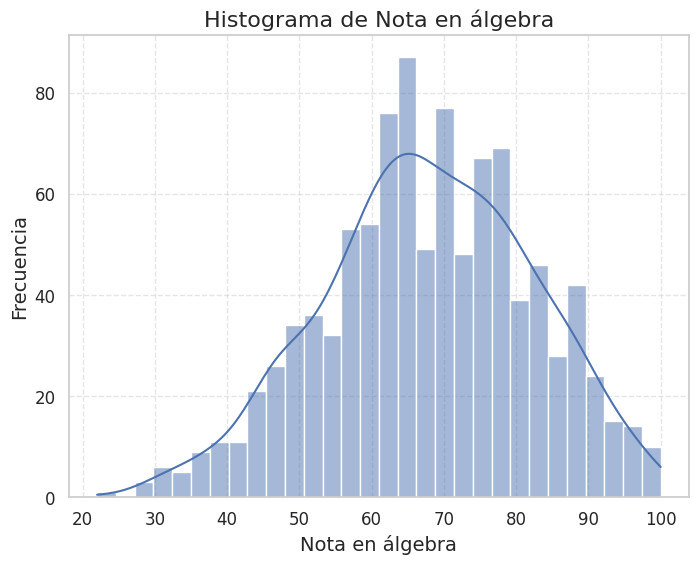

In [ ]:


# Análisis estadístico básico de las columnas relevantes
statistics = df_filtered[['Nota en matemáticas', 'Nota en física', 'Nota en química', 'Nota en álgebra']].agg(['mean', 'std', 'min', 'max'])

statistics

# Generación de histogramas para cada columna
for column in ['Nota en matemáticas', 'Nota en física', 'Nota en química', 'Nota en álgebra']:
    plt.figure(figsize=(8, 6))

    # Comprobamos que la columna sea numérica antes de generar el histograma
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f'Histograma de {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frecuencia', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()


In [ ]:
statistics

,Nota en matemáticas,Nota en física,Nota en química,Nota en álgebra
mean,66.709350,69.333333,68.058943,68.033537
std,14.978481,14.334071,15.207637,14.090389
min,25.000000,32.000000,27.000000,31.000000
max,100.000000,100.000000,100.000000,100.000000


* El rendimiento promedio de los estudiantes es similar en las cuatro asignaturas, con ligeras variaciones.
* La dispersión de las calificaciones es relativamente similar en todas las asignaturas.
* Existen estudiantes con un rendimiento muy alto y otros con un rendimiento muy bajo en todas las asignaturas.

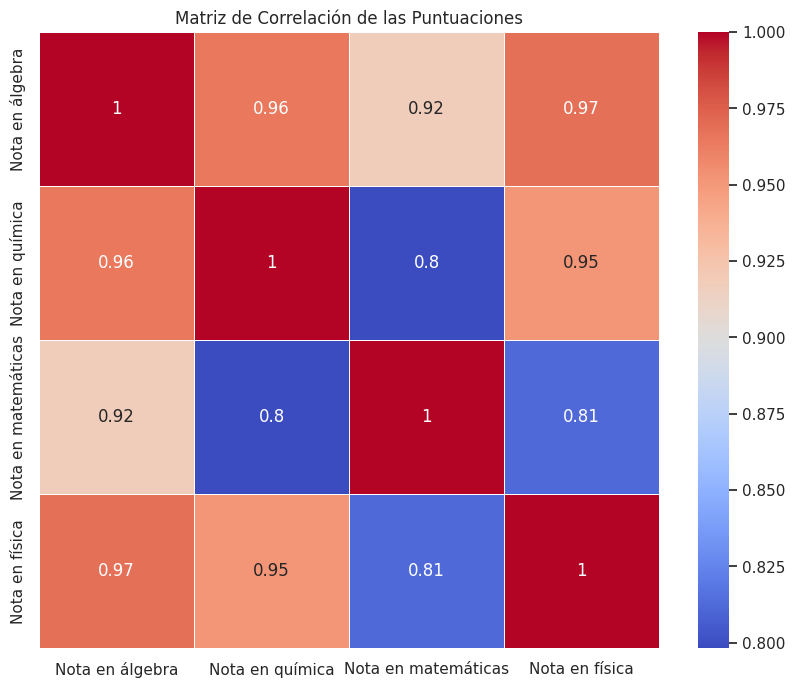

In [ ]:
# Calcular y visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df_filtered[['Nota en álgebra', 'Nota en química', 'Nota en matemáticas', 'Nota en física']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlación de las Puntuaciones")
plt.show()

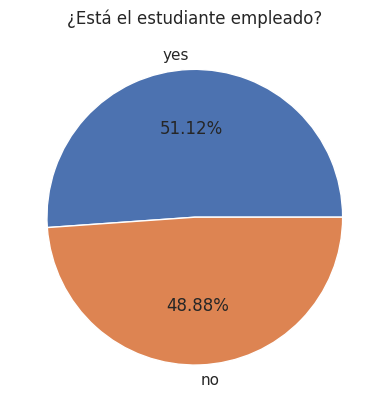

In [ ]:
# Gráfico de pastel para Empleo
labels = df_filtered["Empleo"].value_counts().index
sizes = df_filtered["Empleo"].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('¿Está el estudiante empleado?')
plt.show()


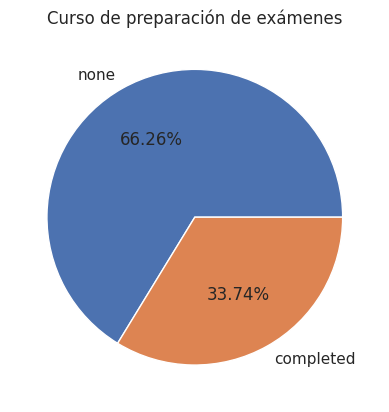

In [ ]:
# Gráfico de pastel para Curso de preparación de exámenes
labels = df_filtered["Curso de preparación de exámenes"].value_counts().index
sizes = df_filtered["Curso de preparación de exámenes"].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Curso de preparación de exámenes')
plt.show()

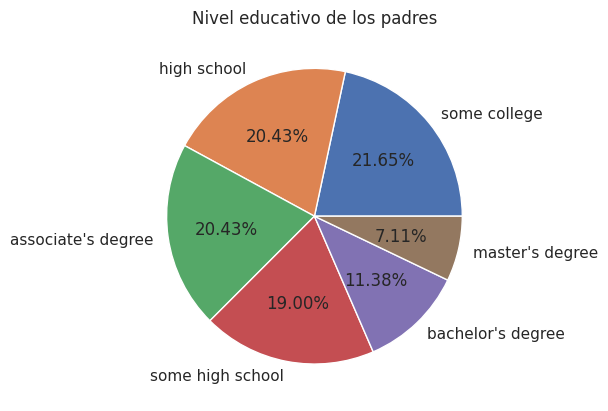

In [ ]:
# Gráfico de pastel para Nivel educativo de los padres
labels = df_filtered["Nivel educativo de los padres"].value_counts().index
sizes = df_filtered["Nivel educativo de los padres"].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Nivel educativo de los padres')
plt.show()

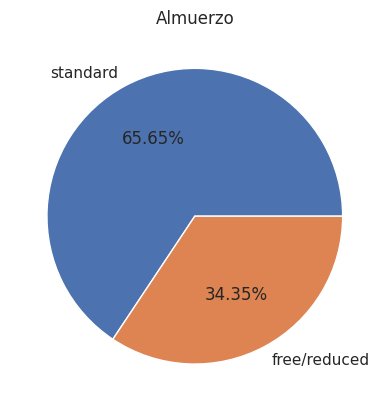

In [ ]:
# Gráfico de pastel para Almuerzo
labels = df_filtered["Almuerzo"].value_counts().index
sizes = df_filtered["Almuerzo"].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Almuerzo')
plt.show()





In [ ]:
# Drop the first five columns by their names
df_l = df.drop(columns=['Género', 'Raza/Etnicidad', 'Nivel educativo de los padres', 'Almuerzo', 'Empleo'])



In [ ]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
Index: 993 entries, 0 to 1005
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Curso de preparación de exámenes  993 non-null    object 
 1   Nota en matemáticas               993 non-null    float64
 2   Nota en física                    993 non-null    float64
 3   Nota en química                   993 non-null    float64
 4   Nota en álgebra                   993 non-null    float64
dtypes: float64(4), object(1)
memory usage: 46.5+ KB


-----
# Regresión logística SIMPLE
----

## ¿ Hay alguna relacion entre el promedio de notas obtenidas y el hecho de haber realizado el curso preparatorio ?

In [ ]:
# Calcular el promedio de las notas
df_l['Promedio de notas'] = df_l[['Nota en matemáticas', 'Nota en física', 'Nota en química', 'Nota en álgebra']].mean(axis=1)


In [ ]:
# Variable dependiente (respuesta)
y = df_l['Curso de preparación de exámenes']

# Variable independiente (predictora): promedio de notas
X = df_l[['Promedio de notas']]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dividir los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Crear el modelo de regresión logística
modelo = LogisticRegression()

In [ ]:
# Ajustar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Realizar predicciones
predicciones = modelo.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Evaluar el modelo
print('Precisión:', accuracy_score(y_test, predicciones))
print('Matriz de Confusión:\n', confusion_matrix(y_test, predicciones))
print('Reporte de Clasificación:\n', classification_report(y_test, predicciones))


Precisión: 0.6884422110552764
Matriz de Confusión:
 [[ 13  56]
 [  6 124]]
Reporte de Clasificación:
               precision    recall  f1-score   support

   completed       0.68      0.19      0.30        69
        none       0.69      0.95      0.80       130

    accuracy                           0.69       199
   macro avg       0.69      0.57      0.55       199
weighted avg       0.69      0.69      0.63       199



### Análisis de los Resultados:

1. **Precisión (Accuracy):**  
   La precisión global del modelo es de aproximadamente **68.8%** (0.688), lo que indica que el modelo acierta en el 68.8% de las predicciones realizadas sobre el conjunto de prueba.
2. **Matriz de Confusión:**  
   La matriz de confusión muestra los siguientes valores:

   - **Clase "completed" (Curso completado):** El modelo predice correctamente 13 veces que los estudiantes completaron el curso. Sin embargo, cometió 56 errores al predecir que no completaron el curso cuando en realidad lo hicieron.
- **Clase "none" (Curso no completado):** El modelo predice correctamente 124 veces que los estudiantes no completaron el curso. Pero cometió 6 errores al predecir que no lo hicieron cuando en realidad lo completaron.

Esto muestra que el modelo tiene dificultades para predecir la clase "completed", ya que la mayoría de las predicciones erróneas son para esta clase.

3. **Reporte de Clasificación:**  
El reporte muestra métricas para cada clase:

- **"completed" (Curso completado):**
  - **Precisión:** 0.68, lo que indica que el modelo es razonablemente preciso en identificar a los estudiantes que completaron el curso, aunque no es excelente.
  - **Recall:** 0.19, lo que indica que el modelo falla al identificar correctamente a los estudiantes que completaron el curso (solo el 19% de los verdaderos casos fueron identificados).
  - **F1-score:** 0.30, lo que refleja un bajo rendimiento en la clase "completed".

- **"none" (Curso no completado):**
  - **Precisión:** 0.69, que es similar a la precisión de la clase "completed", pero el modelo es más confiable en esta predicción.
  - **Recall:** 0.95, lo que indica que el modelo tiene un excelente desempeño al predecir los estudiantes que no completaron el curso.
  - **F1-score:** 0.80, lo que muestra un buen balance entre precisión y recall en esta clase.

4. **Promedio Macro y Ponderado:**
- **Macro promedio:** La media de precisión es 0.69, la media de recall es 0.57, y el F1-score promedio es 0.55. Esto muestra que, aunque el modelo tiene un rendimiento moderado en general, tiene un desempeño desigual entre las clases.
- **Promedio ponderado:** La precisión es 0.69, el recall es 0.69 y el F1-score es 0.63, lo que indica que el modelo tiene un rendimiento equilibrado cuando se considera el tamaño de las clases.

### Conclusión:
Aunque el modelo muestra que el promedio de notas tiene una relación con la probabilidad de haber realizado el curso preparatorio, esta relación no es muy fuerte ni perfectamente identificada. El modelo tiene un rendimiento sesgado hacia predecir que los estudiantes no realizaron el curso, lo que sugiere que otros factores podrían estar influyendo en la decisión de tomar el curso, o que el promedio de notas por sí solo no es suficiente para predecir con alta precisión si un estudiante realizó o no el curso preparatorio.


-----
# Regresión logística MULTIPLE
----


### * ¿Un estudiante completará o no un curso de preparación de exámenes basándose en las notas obtenidas en distintas asignaturas (matemáticas, física, química, y álgebra) ?

In [ ]:

df_l['Curso de preparación de exámenes'] = df_l['Curso de preparación de exámenes'].map({'none': 0, 'completed': 1})


In [ ]:
# Variable dependiente (respuesta)
y = df_l['Curso de preparación de exámenes']

# Variables independientes (predictoras)
X = df_l[['Nota en matemáticas', 'Nota en física', 'Nota en química', 'Nota en álgebra']]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:

# Crear el modelo de regresión logística
modelo = LogisticRegression()

# Ajustar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Realizar predicciones en los datos de prueba
predicciones = modelo.predict(X_test)

# También se puede obtener las probabilidades de clase
probabilidades = modelo.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1 (completed)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Precisión del modelo
print('Precisión:', accuracy_score(y_test, predicciones))

# Matriz de confusión
print('Matriz de Confusión:\n', confusion_matrix(y_test, predicciones))

# Reporte de clasificación
print('Reporte de Clasificación:\n', classification_report(y_test, predicciones))


Precisión: 0.7185929648241206
Matriz de Confusión:
 [[110  20]
 [ 36  33]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.75      0.85      0.80       130
           1       0.62      0.48      0.54        69

    accuracy                           0.72       199
   macro avg       0.69      0.66      0.67       199
weighted avg       0.71      0.72      0.71       199



### Resultados del Análisis

#### Matriz de Confusión
La matriz de confusión del modelo de regresión logística para predecir la finalización de un curso de preparación de exámenes muestra lo siguiente:


- **True Negatives (TN)**: 110 estudiantes fueron correctamente clasificados como no completaron el curso.
- **False Positives (FP)**: 20 estudiantes fueron incorrectamente clasificados como completaron el curso, pero no lo hicieron.
- **False Negatives (FN)**: 36 estudiantes fueron incorrectamente clasificados como no completaron el curso, pero sí lo hicieron.
- **True Positives (TP)**: 33 estudiantes fueron correctamente clasificados como completaron el curso.

#### Reporte de Clasificación
El reporte de clasificación proporciona una visión detallada del rendimiento del modelo, incluyendo la precisión, recall y f1-score para cada clase:


- **Clase 0 (No completaron el curso)**:
  - **Precisión**: 0.75. Indica que el 75% de las predicciones de "no completaron el curso" fueron correctas.
  - **Recall**: 0.85. Indica que el 85% de los estudiantes que realmente no completaron el curso fueron correctamente identificados.
  - **F1-score**: 0.80. Es la media armónica de la precisión y el recall, proporcionando un equilibrio entre ambas métricas.
  - **Support**: 130. Número de estudiantes que realmente no completaron el curso.

- **Clase 1 (Completaron el curso)**:
  - **Precisión**: 0.62. Indica que el 62% de las predicciones de "completaron el curso" fueron correctas.
  - **Recall**: 0.48. Indica que el 48% de los estudiantes que realmente completaron el curso fueron correctamente identificados.
  - **F1-score**: 0.54. Es la media armónica de la precisión y el recall, proporcionando un equilibrio entre ambas métricas.
  - **Support**: 69. Número de estudiantes que realmente completaron el curso.

- **Precisión Global**: 0.72. Indica que el 72% de todas las predicciones fueron correctas.
- **Macro Avg**:
  - **Precisión**: 0.69. Media no ponderada de la precisión para ambas clases.
  - **Recall**: 0.66. Media no ponderada del recall para ambas clases.
  - **F1-score**: 0.67. Media no ponderada del f1-score para ambas clases.

- **Weighted Avg**:
  - **Precisión**: 0.71. Media ponderada de la precisión considerando el número de muestras de cada clase.
  - **Recall**: 0.72. Media ponderada del recall considerando el número de muestras de cada clase.
  - **F1-score**: 0.71. Media ponderada del f1-score considerando el número de muestras de cada clase.

### Conclusiones
- **Desempeño General**: El modelo tiene una precisión global de 0.72, lo que indica un rendimiento aceptable pero con margen para mejoras, especialmente en la clase de estudiantes que completaron el curso (Clase 1).
- **Clase Mayoritaria (0)**: El modelo funciona mejor para predecir la clase mayoritaria (estudiantes que no completaron el curso), con una precisión de 0.75 y un recall de 0.85.
- **Clase Minoritaria (1)**: El modelo tiene más dificultades para predecir la clase minoritaria (estudiantes que completaron el curso), con una precisión de 0.62 y un recall de 0.48.



In [ ]:
# Crear un modelo con hiperparámetros específicos
modelo = LogisticRegression(C=1.0, solver='liblinear')

# Ajustar el modelo nuevamente
modelo.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

### Coeficientes del Modelo
El análisis de los coeficientes del modelo de regresión logística nos permite entender la relación entre cada variable predictora y la probabilidad de que un estudiante complete el curso de preparación de exámenes.



In [ ]:
# Ver los coeficientes del modelo
coeficientes = modelo.coef_[0]
print('Coeficientes:', coeficientes)

# Ver los nombres de las variables predictoras
variables = X.columns
for var, coef in zip(variables, coeficientes):
    print(f'{var}: {coef}')


Coeficientes: [-0.12514928 -0.17354676  0.07622199  0.24751725]
Nota en matemáticas: -0.1251492769628058
Nota en física: -0.17354675839622968
Nota en química: 0.07622199073251903
Nota en álgebra: 0.24751724586337281


- **Nota en matemáticas**: Un coeficiente de -0.1251 indica que, manteniendo las otras variables constantes, un aumento en la nota de matemáticas está asociado con una ligera disminución en la probabilidad de completar el curso de preparación de exámenes.
- **Nota en física**: Un coeficiente de -0.1735 sugiere que una mayor nota en física también está asociada con una disminución en la probabilidad de completar el curso.
- **Nota en química**: Un coeficiente de 0.0762 muestra una pequeña asociación positiva entre una mejor nota en química y la probabilidad de completar el curso.
- **Nota en álgebra**: El coeficiente de 0.2475 indica una asociación positiva más fuerte, sugiriendo que una mejor nota en álgebra aumenta significativamente la probabilidad de completar el curso.


In [ ]:
from sklearn.metrics import roc_curve, auc

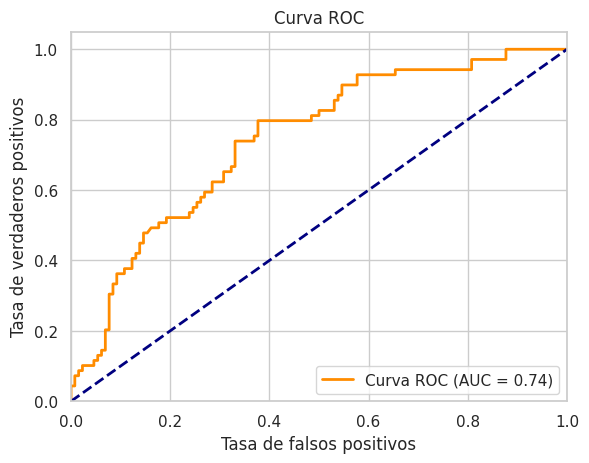

In [ ]:

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, probabilidades)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


### Curva ROC y AUC
Evaluacion el rendimiento del modelo de clasificación.

- **AUC (Área Bajo la Curva)**: 0.74. El valor del AUC proporciona una medida agregada del rendimiento en todos los umbrales de clasificación. Un AUC de 0.74 indica que el modelo tiene una capacidad razonable para distinguir entre los estudiantes que completan y los que no completan el curso de preparación de exámenes.

#### Interpretación
- **Curva ROC**: La curva ROC se desvía hacia la esquina superior izquierda, lo cual es una buena señal de rendimiento del modelo. Cuanto más se acerque la curva a esta esquina, mejor es el modelo.
- **AUC**: Un AUC de 0.74 sugiere que, en promedio, hay un 74% de probabilidad de que el modelo clasifique correctamente a un estudiante que completa el curso de preparación de exámenes frente a uno que no lo hace.

### Conclusiones
- **Coeficientes del Modelo**: Las notas en álgebra tienen la mayor influencia positiva en la probabilidad de completar el curso, mientras que las notas en matemáticas y física tienen una influencia negativa.
- **Curva ROC y AUC**: El AUC de 0.74 indica un rendimiento aceptable del modelo, aunque hay margen para mejoras.


----
# K-means clustering
----

## " Hipótesis de Eficacia del Curso de Preparación "
#### "El curso de preparación de exámenes influye en las notas de los estudiantes en matemáticas, física, química y álgebra."
* los resultados del clustering son analizados en combinación con la información del curso para ver si ciertos clusters (grupos de rendimiento) están asociados con haber tomado el curso de preparación.

In [ ]:

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df_l [['Nota en matemáticas', 'Nota en física', 'Nota en química', 'Nota en álgebra']]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
pca = PCA(n_components=2)  # Reducir a 2 dimensiones para visualización
X_pca = pca.fit_transform(X_scaled)


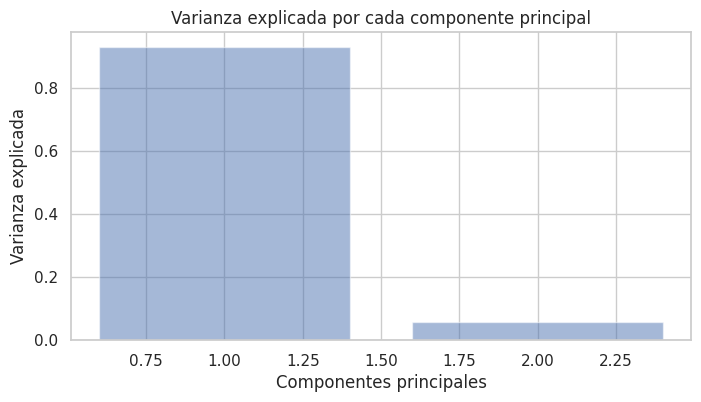

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.title('Varianza explicada por cada componente principal')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada')
plt.show()


- Primer componente principal: Captura una gran proporción de la varianza total (cerca del 80%). Esto sugiere que una gran parte de la variabilidad en los datos puede ser explicada por este único componente.
- Segundo componente principal: Captura una proporción mucho menor de la varianza.


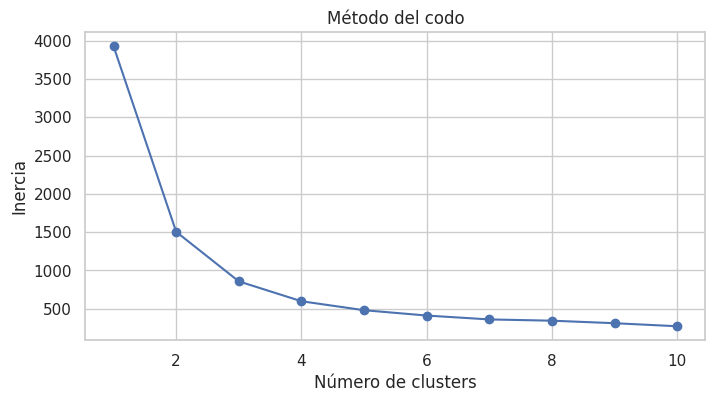

In [ ]:
# Método del codo para encontrar el número óptimo de clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

El codo parece estar alrededor de k=3. Esto indicaría que, según este método, el número óptimo de clusters para este conjunto de datos sería 3.

In [ ]:
# Entrenar el modelo K-means con 3 clusters (ejemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
df['Cluster'] = kmeans.labels_

<ipython-input-66-5334c898a893>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


In [ ]:
# Obtener los centroides
centroides = kmeans.cluster_centers_

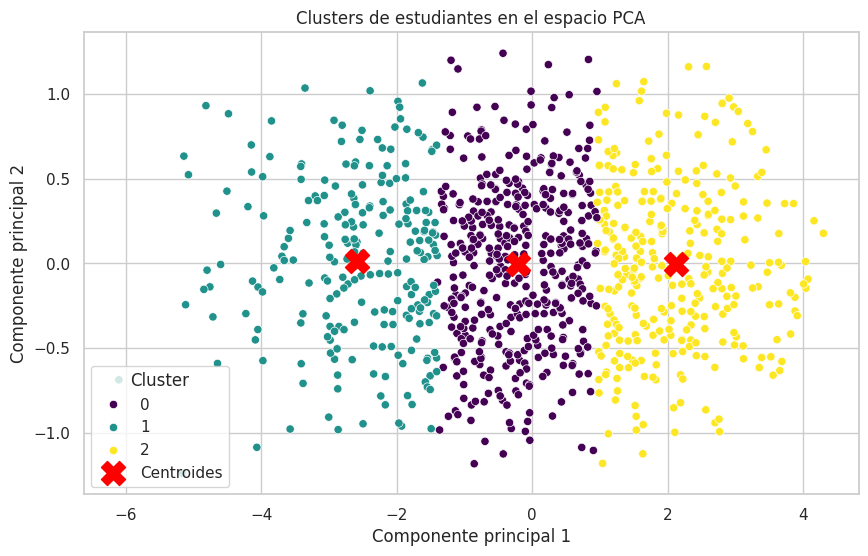

In [ ]:
# Visualizar los clusters en el espacio PCA con centroides
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], s=300, c='red', label='Centroides', marker='X')
plt.title('Clusters de estudiantes en el espacio PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title='Cluster')
plt.show()

Relación con la hipótesis:

- Cluster 0 (Morado): Este grupo se encuentra mayormente concentrado en el centro de la gráfica. Podría representar a estudiantes con un rendimiento promedio en las cuatro materias.
-Cluster 1 (Verde): Este grupo se encuentra a la izquierda del Cluster 0. Podría representar a estudiantes con rendimiento más bajo en las cuatro materias.
-Cluster 2 (Amarillo): Este grupo se encuentra a la derecha del Cluster 0. Podría representar a estudiantes con rendimiento más alto en las cuatro materias.

----
Interpretación en el contexto de la hipótesis:

Si el curso de preparación de exámenes es efectivo, podríamos esperar que una proporción significativa de estudiantes que tomaron el curso se encuentren en el Cluster 2 (rendimiento alto).
Alternativamente, si el curso no es efectivo, podríamos encontrar que los estudiantes que tomaron el curso están distribuidos uniformemente entre los tres clusters, o que se concentran en el Cluster 0 (rendimiento promedio) o en el Cluster 1 (rendimiento bajo).

Cluster                             0    1    2
Curso de preparación de exámenes               
completed                         140   39  154
none                              291  195  174


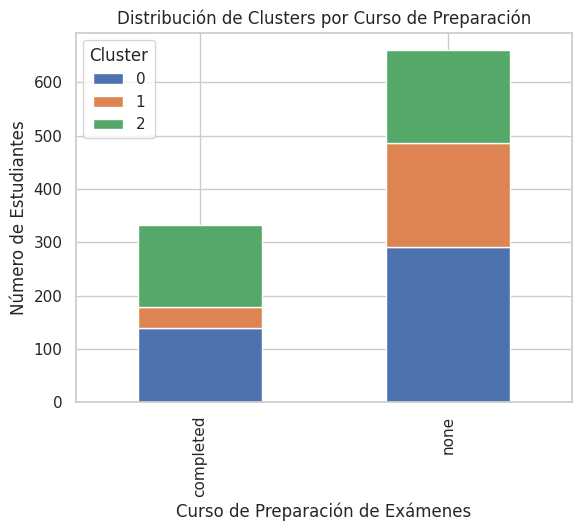

In [ ]:
# Analizar la relación con el curso de preparación
curso_clusters = df.groupby('Curso de preparación de exámenes')['Cluster'].value_counts().unstack().fillna(0)
print(curso_clusters)
curso_clusters.plot(kind='bar', stacked=True)
plt.title('Distribución de Clusters por Curso de Preparación')
plt.xlabel('Curso de Preparación de Exámenes')
plt.ylabel('Número de Estudiantes')
plt.show()

----
1. Desigualdad en la distribución de clusters:

- Cluster 2: Es el más numeroso en el grupo de estudiantes que no completaron el curso. Esto sugiere que este cluster podría representar a estudiantes con un rendimiento académico general más bajo, quienes quizás no sintieron la necesidad de tomar el curso o no tuvieron acceso a él.
- Cluster 0 y 1: Estos clusters parecen estar más equilibrados en cuanto a la distribución entre quienes tomaron el curso y quienes no. Esto podría indicar que estos clusters representan a estudiantes con un rango más amplio de rendimiento académico y que la decisión de tomar el curso pudo estar influenciada por otros factores.

2. Posible impacto del curso:

* Si comparamos la proporción de estudiantes del cluster 2 en ambos grupos (con y sin curso), y observamos una diferencia significativa, podríamos inferir que el curso podría estar teniendo un impacto positivo en el rendimiento, al menos en términos de ayudar a los estudiantes a pasar de un cluster de menor rendimiento a uno más alto.